# Problemas

## Algunos productos tienen su .zip corrupto y no se puede descomprimir:
S3A_SL_2_LST____20180518T125419_20180518T143518_20180519T203221_6059_031_195______LN2_O_NT_003
S3A_SL_2_LST____20180418T123152_20180418T141251_20180419T194201_6059_030_152______LN2_O_NT_003
S3A_SL_2_LST____20180523T003729_20180523T021828_20180524T063958_6059_031_259______LN2_O_NT_003
S3A_SL_2_LST____20180523T122423_20180523T140522_20180524T194914_6059_031_266______LN2_O_NT_003
S3A_SL_2_LST____20180526T124650_20180526T142749_20180527T200646_6059_031_309______LN2_O_NT_003

## Algunos products no se logran cargar correctamente despues de descomprimidos:
S3A_SL_2_LST____20180217T014056_20180217T032155_20180930T083426_6059_028_060______LR1_R_NT_003
S3A_SL_2_LST____20180309T130909_20180309T145008_20180930T091302_6059_028_352______LR1_R_NT_003
S3A_SL_2_LST____20190227T130531_20190227T144631_20190228T233400_6059_042_024______LN2_O_NT_003
S3A_SL_2_LST____20200306T115429_20200306T133528_20200307T195439_6059_055_337______LN2_O_NT_004
S3B_SL_2_LST____20200321T130712_20200321T144811_20200322T194334_6059_037_024______LN2_O_NT_004


In [1]:
import os
import sys
sys.path.append("../")
import subprocess

import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
from datetime import datetime

import settings
from LST_Processing import LST, LSTDataset, find_best_temperature_candidate
# from process_sentinel2 import DayDataGenerator
from process_sentinel3 import OLCIdataGenerator

In [2]:
wkt_footprint = "POLYGON((-55.16629529644229 -34.7494869239046,-55.02038312603214 -34.7494869239046,-55.02038312603214 -34.868725532230165,-55.16629529644229 -34.868725532230165,-55.16629529644229 -34.7494869239046))"
raw_lst_data_path = settings.raw_data_path
processed_data_path = settings.processed_data_path
output_water_temperature_txt = os.path.join(settings.final_data_path, "water_temperatures.txt")

### Get and display data from a defined date

In [3]:
lst_dataset = LSTDataset(raw_lst_data_path, wkt_footprint)
temperature_data, errors = lst_dataset.get_day_data(datetime.date(datetime(2022,12,5)))
sampling_points_coords = {"SAUCE NORTE": [-34.795398, -55.047355],
                          "SAUCE SUR": [-34.843127, -55.064624],
                          "TA": [-34.829670, -55.049758]}
sampling_points_coords = [v for k, v in sampling_points_coords.items()]

27.452017


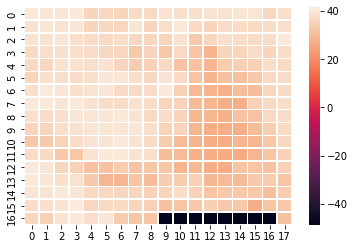

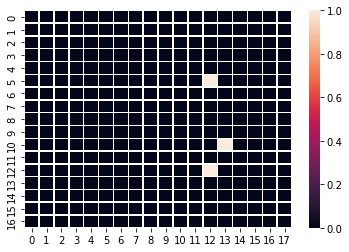

/////////////////////////


In [4]:
for lst in temperature_data:
    sampling_points_mask = lst.make_mask_from_coords(sampling_points_coords)
    
    water_temp_avg = lst.lst[np.nonzero(sampling_points_mask)].mean()
    
    print(water_temp_avg)
    
    ax = sns.heatmap(lst.lst, linewidth=0.5)
    plt.show()
    
    ax = sns.heatmap(sampling_points_mask, linewidth=0.5)
    plt.show()
    print("/////////////////////////")

### Get water temperature from every Sentinel-3 valid day

In [5]:
RAW_DATA_PATH = settings.raw_data_path
DATE_FORMAT = '%Y-%m-%d'

data_generator = OLCIdataGenerator(processed_data_path, skip_invalid=True)

valid_dates = sorted([day.date.date() for day in data_generator])
print("Valid Sentinel-3 days:", len(valid_dates))

Valid Sentinel-3 days: 313


In [ ]:
python_exec_path = sys.executable
lst_processing_script_dir = "/home/enzo/Cyano_Detection/src/"
lst_processing_script_path = os.path.join(lst_processing_script_dir, "LST_Processing.py")

for vd in valid_dates:
    print(vd)
    run_command = f"cd {lst_processing_script_dir} ; {python_exec_path} {lst_processing_script_path} -i {str(vd)} -o {output_water_temperature_txt}"
    print(run_command)
    print(os.popen(run_command).read())

2016-11-03
cd /home/enzo/Cyano_Detection/src/ ; /home/enzo/anaconda3/envs/cyano_venv/bin/python /home/enzo/Cyano_Detection/src/LST_Processing.py -i 2016-11-03 -o /media/enzo/T7/Cyano_Detection/data/final/water_temperatures.txt

2016-11-05
cd /home/enzo/Cyano_Detection/src/ ; /home/enzo/anaconda3/envs/cyano_venv/bin/python /home/enzo/Cyano_Detection/src/LST_Processing.py -i 2016-11-05 -o /media/enzo/T7/Cyano_Detection/data/final/water_temperatures.txt

2016-11-06
cd /home/enzo/Cyano_Detection/src/ ; /home/enzo/anaconda3/envs/cyano_venv/bin/python /home/enzo/Cyano_Detection/src/LST_Processing.py -i 2016-11-06 -o /media/enzo/T7/Cyano_Detection/data/final/water_temperatures.txt

2016-11-10
cd /home/enzo/Cyano_Detection/src/ ; /home/enzo/anaconda3/envs/cyano_venv/bin/python /home/enzo/Cyano_Detection/src/LST_Processing.py -i 2016-11-10 -o /media/enzo/T7/Cyano_Detection/data/final/water_temperatures.txt

2016-11-25
cd /home/enzo/Cyano_Detection/src/ ; /home/enzo/anaconda3/envs/cyano_venv/bin


100% done.

2018-02-16
cd /home/enzo/Cyano_Detection/src/ ; /home/enzo/anaconda3/envs/cyano_venv/bin/python /home/enzo/Cyano_Detection/src/LST_Processing.py -i 2018-02-16 -o /media/enzo/T7/Cyano_Detection/data/final/water_temperatures.txt

2018-02-23
cd /home/enzo/Cyano_Detection/src/ ; /home/enzo/anaconda3/envs/cyano_venv/bin/python /home/enzo/Cyano_Detection/src/LST_Processing.py -i 2018-02-23 -o /media/enzo/T7/Cyano_Detection/data/final/water_temperatures.txt

2018-03-02
cd /home/enzo/Cyano_Detection/src/ ; /home/enzo/anaconda3/envs/cyano_venv/bin/python /home/enzo/Cyano_Detection/src/LST_Processing.py -i 2018-03-02 -o /media/enzo/T7/Cyano_Detection/data/final/water_temperatures.txt

2018-03-03
cd /home/enzo/Cyano_Detection/src/ ; /home/enzo/anaconda3/envs/cyano_venv/bin/python /home/enzo/Cyano_Detection/src/LST_Processing.py -i 2018-03-03 -o /media/enzo/T7/Cyano_Detection/data/final/water_temperatures.txt

2018-03-04
cd /home/enzo/Cyano_Detection/src/ ; /home/enzo/anaconda3/envs/c


2019-01-24
cd /home/enzo/Cyano_Detection/src/ ; /home/enzo/anaconda3/envs/cyano_venv/bin/python /home/enzo/Cyano_Detection/src/LST_Processing.py -i 2019-01-24 -o /media/enzo/T7/Cyano_Detection/data/final/water_temperatures.txt

100% done.

100% done.

100% done.

2019-01-28
cd /home/enzo/Cyano_Detection/src/ ; /home/enzo/anaconda3/envs/cyano_venv/bin/python /home/enzo/Cyano_Detection/src/LST_Processing.py -i 2019-01-28 -o /media/enzo/T7/Cyano_Detection/data/final/water_temperatures.txt

2019-02-02
cd /home/enzo/Cyano_Detection/src/ ; /home/enzo/anaconda3/envs/cyano_venv/bin/python /home/enzo/Cyano_Detection/src/LST_Processing.py -i 2019-02-02 -o /media/enzo/T7/Cyano_Detection/data/final/water_temperatures.txt

2019-02-04
cd /home/enzo/Cyano_Detection/src/ ; /home/enzo/anaconda3/envs/cyano_venv/bin/python /home/enzo/Cyano_Detection/src/LST_Processing.py -i 2019-02-04 -o /media/enzo/T7/Cyano_Detection/data/final/water_temperatures.txt

2019-02-05
cd /home/enzo/Cyano_Detection/src/ ; /ho


2019-11-30
cd /home/enzo/Cyano_Detection/src/ ; /home/enzo/anaconda3/envs/cyano_venv/bin/python /home/enzo/Cyano_Detection/src/LST_Processing.py -i 2019-11-30 -o /media/enzo/T7/Cyano_Detection/data/final/water_temperatures.txt

2019-12-01
cd /home/enzo/Cyano_Detection/src/ ; /home/enzo/anaconda3/envs/cyano_venv/bin/python /home/enzo/Cyano_Detection/src/LST_Processing.py -i 2019-12-01 -o /media/enzo/T7/Cyano_Detection/data/final/water_temperatures.txt

2019-12-02
cd /home/enzo/Cyano_Detection/src/ ; /home/enzo/anaconda3/envs/cyano_venv/bin/python /home/enzo/Cyano_Detection/src/LST_Processing.py -i 2019-12-02 -o /media/enzo/T7/Cyano_Detection/data/final/water_temperatures.txt

2019-12-09
cd /home/enzo/Cyano_Detection/src/ ; /home/enzo/anaconda3/envs/cyano_venv/bin/python /home/enzo/Cyano_Detection/src/LST_Processing.py -i 2019-12-09 -o /media/enzo/T7/Cyano_Detection/data/final/water_temperatures.txt

2019-12-10
cd /home/enzo/Cyano_Detection/src/ ; /home/enzo/anaconda3/envs/cyano_venv/bi


2020-03-03
cd /home/enzo/Cyano_Detection/src/ ; /home/enzo/anaconda3/envs/cyano_venv/bin/python /home/enzo/Cyano_Detection/src/LST_Processing.py -i 2020-03-03 -o /media/enzo/T7/Cyano_Detection/data/final/water_temperatures.txt

100% done.

2020-03-04
cd /home/enzo/Cyano_Detection/src/ ; /home/enzo/anaconda3/envs/cyano_venv/bin/python /home/enzo/Cyano_Detection/src/LST_Processing.py -i 2020-03-04 -o /media/enzo/T7/Cyano_Detection/data/final/water_temperatures.txt

100% done.

2020-03-05
cd /home/enzo/Cyano_Detection/src/ ; /home/enzo/anaconda3/envs/cyano_venv/bin/python /home/enzo/Cyano_Detection/src/LST_Processing.py -i 2020-03-05 -o /media/enzo/T7/Cyano_Detection/data/final/water_temperatures.txt

100% done.

2020-03-07
cd /home/enzo/Cyano_Detection/src/ ; /home/enzo/anaconda3/envs/cyano_venv/bin/python /home/enzo/Cyano_Detection/src/LST_Processing.py -i 2020-03-07 -o /media/enzo/T7/Cyano_Detection/data/final/water_temperatures.txt

100% done.

2020-03-13
cd /home/enzo/Cyano_Detectio

In [11]:
print(lst_processing_script_dir)
print(sys.executable)

/home/enzo/anaconda3/envs/cyano_venv/bin/python


In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime

with open(output_water_temperature_txt) as file:
    temps = file.readlines()

temp_data = [{"timestamp":datetime.strptime(d.split(",")[0],'%Y-%m-%d %H:%M'), "temperature":float(d.split(",")[1])} for d in temps if "." in d.split(",")[1]]
temp_df = pd.DataFrame(temp_data)

temp_df = temp_df.set_index("timestamp")
#temp_df = temp_df.between_time('00:00', '03:00')
temp_df = temp_df.between_time('11:00', '15:00')
print(temp_df)

KeyError: "None of ['timestamp'] are in the columns"

In [11]:
temp_data

[]

In [ ]:
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure, show, output_file, save
from bokeh.io import output_notebook, push_notebook, show
from bokeh.transform import dodge
output_notebook()

source_temp = ColumnDataSource(temp_df)

hover_temp = HoverTool(names = ['Temp/timestamp'],
                  tooltips=[('Temperature (C)','@temperature'), ("Capture time", "@timestamp{%F}")],
                    formatters={'@timestamp': 'datetime'},
                  )
#output_file(filename="RAM_and_GPU_memory.html", title="Static HTML file")
p = figure(x_axis_type='datetime', x_axis_label='timestamp', y_axis_label='Water average temperature', width=800, height=300, name="scatter")
p.add_tools(hover_temp)
p.line(x='timestamp', y='temperature', source=source_temp, hover_alpha=1, name="Temp/timestamp")
handle = show(p, notebook_handle=True)
push_notebook(handle=handle)
#save(p)